In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
from textblob import TextBlob

# Define the ticker and the time period
ticker = 'TSLA'
start_date = '2020-01-01'
end_date = '2023-01-01'

# Fetch the stock data
tesla_data = yf.download(ticker, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed


In [10]:
tesla_data.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500
2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500
2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000
2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500
2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500


In [11]:
tesla_data.columns

MultiIndex([( 'Close', 'TSLA'),
            (  'High', 'TSLA'),
            (   'Low', 'TSLA'),
            (  'Open', 'TSLA'),
            ('Volume', 'TSLA')],
           names=['Price', 'Ticker'])

In [12]:
tesla_data.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

tesla_data.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [13]:
# Create a DataFrame with dates from the AAPL data
dates = tesla_data.index
text_data = pd.DataFrame(dates, columns=['Date'])

In [14]:
# Generate random headlines
headline_samples = [
    "TSLA hits record high",
    "Concerns over TSLA's future growth",
    "TSLA to unveil new product next month",
    "TSLA reports earnings that exceed forecasts",
    "Market downturn affects TSLA",
    "TSLA invests in renewable energy",
    "New TSLA CEO announced",
    "TSLA faces regulatory scrutiny",
    "TSLA rumored to acquire a tech startup",
    "TSLA's market share grows"
]

# Assign a random headline to each date
text_data['Headline'] = np.random.choice(headline_samples, size=len(text_data))

# Display the first few rows of the updated DataFrame
text_data.head()

,Date,Headline
0,2020-01-02,TSLA rumored to acquire a tech startup
1,2020-01-03,New TSLA CEO announced
2,2020-01-06,TSLA invests in renewable energy
3,2020-01-07,New TSLA CEO announced
4,2020-01-08,TSLA rumored to acquire a tech startup


In [15]:
text_data.head(30)

,Date,Headline
0,2020-01-02,TSLA rumored to acquire a tech startup
1,2020-01-03,New TSLA CEO announced
2,2020-01-06,TSLA invests in renewable energy
3,2020-01-07,New TSLA CEO announced
4,2020-01-08,TSLA rumored to acquire a tech startup
5,2020-01-09,Market downturn affects TSLA
6,2020-01-10,TSLA reports earnings that exceed forecasts
7,2020-01-13,TSLA to unveil new product next month
8,2020-01-14,TSLA's market share grows
9,2020-01-15,TSLA to unveil new product next month


In [21]:
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Applying the sentiment analysis function to your headlines
text_data['Sentiment'] = text_data['Headline'].apply(calculate_sentiment)

In [22]:
# Aligning sentiment scores with the stock closing prices on the same date
combined_data = text_data.set_index('Date').join(tesla_data['Close'])
combined_data.head()

,Headline,Sentiment,Close
Date,,,
2020-01-02,TSLA rumored to acquire a tech startup,0.000000,28.684000
2020-01-03,New TSLA CEO announced,0.136364,29.534000
2020-01-06,TSLA invests in renewable energy,0.000000,30.102667
2020-01-07,New TSLA CEO announced,0.136364,31.270666
2020-01-08,TSLA rumored to acquire a tech startup,0.000000,32.809334


In [23]:
combined_data['Daily Returns'] = combined_data['Close'].pct_change()

In [24]:
combined_data.head()

,Headline,Sentiment,Close,Daily Returns
Date,,,,
2020-01-02,TSLA rumored to acquire a tech startup,0.000000,28.684000,NaN
2020-01-03,New TSLA CEO announced,0.136364,29.534000,0.029633
2020-01-06,TSLA invests in renewable energy,0.000000,30.102667,0.019255
2020-01-07,New TSLA CEO announced,0.136364,31.270666,0.038801
2020-01-08,TSLA rumored to acquire a tech startup,0.000000,32.809334,0.049205


In [25]:
correlation = combined_data['Sentiment'].corr(combined_data['Daily Returns'])
print("Correlation between sentiment and daily stock returns:", correlation)

Correlation between sentiment and daily stock returns: -0.019496637882112963


In [26]:
correlation = combined_data['Sentiment'].corr(combined_data['Close'])
print("Correlation between sentiment and closing:", correlation)

Correlation between sentiment and closing: 0.007907998873654218


In [27]:
combined_data['Lagged Sentiment'] = combined_data['Sentiment'].shift(1)
correlation = combined_data['Lagged Sentiment'].corr(combined_data['Daily Returns'])
print("Correlation between sentiment and closing:", correlation)

Correlation between sentiment and closing: 0.00034319820120806737


In [28]:
# Spearman correlation between sentiment and daily returns
spearman_corr_returns = combined_data['Sentiment'].corr(combined_data['Daily Returns'], method='spearman')
print("Spearman correlation (sentiment vs daily returns):", spearman_corr_returns)

Spearman correlation (sentiment vs daily returns): -0.017534491752401536


In [29]:
# Spearman correlation between sentiment and closing prices
spearman_corr_close = combined_data['Sentiment'].corr(combined_data['Close'], method='spearman')
print("Spearman correlation (sentiment vs closing price):", spearman_corr_close)

Spearman correlation (sentiment vs closing price): 0.012287449423982754


In [30]:
from scipy.stats import kendalltau

tau_returns, _ = kendalltau(combined_data['Sentiment'], combined_data['Daily Returns'])
tau_close, _ = kendalltau(combined_data['Sentiment'], combined_data['Close'])

print("Kendall's Tau (sentiment vs daily returns):", tau_returns)
print("Kendall's Tau (sentiment vs closing price):", tau_close)

Kendall's Tau (sentiment vs daily returns): nan
Kendall's Tau (sentiment vs closing price): 0.0098116258185713


In [31]:
print(combined_data['Sentiment'].isna().sum())
print(combined_data['Daily Returns'].isna().sum())
print(combined_data[['Sentiment', 'Daily Returns']].dropna().shape)

0
1
(755, 2)


In [32]:
from scipy.stats import kendalltau

# Drop rows with NaNs before computing
filtered = combined_data[['Sentiment', 'Daily Returns']].dropna()
tau_returns, _ = kendalltau(filtered['Sentiment'], filtered['Daily Returns'])
print("Fixed Kendall's Tau (sentiment vs daily returns):", tau_returns)

Fixed Kendall's Tau (sentiment vs daily returns): -0.013337656121315149


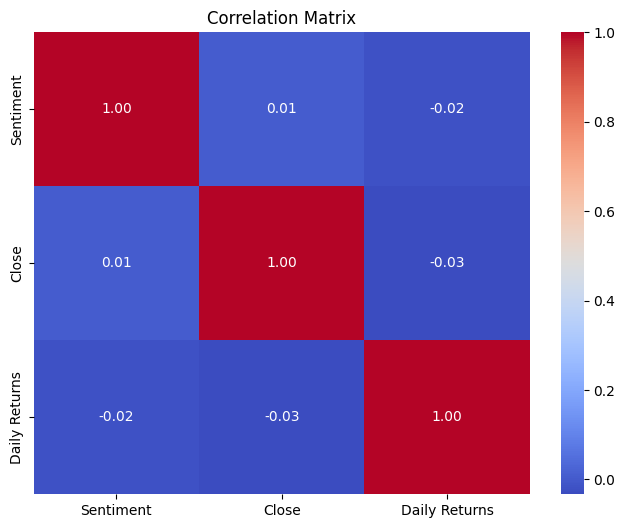

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns you want to compare
corr_data = combined_data[['Sentiment', 'Close', 'Daily Returns']].dropna()

# Calculate correlation matrix
corr_matrix = corr_data.corr(method='pearson')  # You can also try 'spearman' or 'kendall'

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
